# Lesson2. Using Geopandas

Geopandas는 Pandas 위에 구축된 Python 모듈로 기능을 확장한 데이터 분석 라이브러리이다. Geopandas를 통해 Shape files(.shp)나 Post 등에 저장된 공간 데이터로 작업할 수 있다. Geopandas에는 오버레이 분석, 지오코딩, 공간 집계 방법 및 속성/공간 결합과 같은 훌륭한 내장 공간 처리/분석 기능이 많이 있으며, 모두 상당히 유용하고 일반적으로 사용되는 GIS 기능이다. Geopandas를 사용하여 Rasterio로 간단한 처리를 수행할 수도 있지만 래스터(raster) 분석을 수행하기 위한 기능이 풍부한 파이썬 모듈도 있다(Lesson.7에서 다룸).

## Shapefile 불러오기

먼저 Dataset을 다운로드 받자. => [Download Data](https://github.com/riverallzero/Study_GIS/blob/main/Dataset/Lesson2)


In [1]:
!pip install geopandas

In [2]:
# Geopandas모듈 불러오기
import geopandas as gpd

# 데이터 파일 경로 설정 
fp = "Dataset/Lesson2/DAMSELFISH_distributions.shp"

# Geopandas를 이용해 파일 읽기 
data = gpd.read_file(fp)
print(type(data))

<class 'geopandas.geodataframe.GeoDataFrame'>


GeoDataFrame은 공간적 데이터를 Dataframe에서 다룰 수 있고 이 기능을 GIS에 이용하는 것이다.
Dataframe의 head()함수를 이용해서 총 데이터의 5개의 행을 출력해 확인할 수 있다.

In [3]:
data.head()

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,RL_UPDATE,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry
0,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-115.64375 29.71392, -115.61585 29.6..."
1,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-105.58995 21.89340, -105.56483 21.8..."
2,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-111.15962 19.01536, -111.15948 18.9..."
3,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,"POLYGON ((-80.86500 -0.77894, -80.75930 -0.833..."
4,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,"POLYGON ((-67.33922 -55.67610, -67.33755 -55.6..."


이 데이터를 그래프로 그려본다면? plot()함수를 이용해 간단한 지도를 그려볼 수 있다.

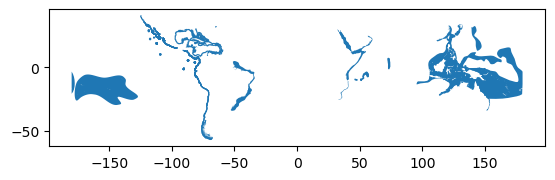

In [4]:
data.plot();

## 좌표기준계 (Coordinate reference system)


GeoDataFrame으로 읽은 shapefile에는 거의 대부분 공간(좌표계)에 대한 정보를 담고 있다. **EPSG** 번호는 데이터 세트의 좌표계에 대해 알려주는 코드이다. "EPSG 측지 매개변수 데이터 세트는 적용 시 전역, 지역, 국가 또는 지역일 수 있는 좌표 참조 시스템 및 좌표 변환의 정의 모음이다." 여기에 있는 EPSG 번호 4326은 **WGS84** 좌표계에 속한다(즉, 좌표는 소수점(lat, lon)). 

In [5]:
data.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Shapefile 작성하기

Shapefile도 작성해서 만들 수 있다. 입력 데이터의 첫 번째 행 50개를 선택하고 인덱스 슬라이싱을 사용하여 먼저 데이터를 선택한 다음 gpd.to _fileds - 함수를 사용하여 선택 항목을 Shapefile에 쓰도록 하겠다.

In [6]:
# 저장될 폴더 생성하기
out = r"Dataset/Lesson2/DAMSELFISH_distributions_selection.shp"

# 첫 번째 50개의 행 선택하기
selection = data[0:50]

# 이 행을 새로운 Shapefile로 만들기
selection.to_file(out)

# Geopandas를 이용해 만든 파일 읽기 
data = gpd.read_file(out)
data.head()

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,RL_UPDATE,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry
0,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-115.64375 29.71392, -115.61585 29.6..."
1,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-105.58995 21.89340, -105.56483 21.8..."
2,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-111.15962 19.01536, -111.15948 18.9..."
3,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,"POLYGON ((-80.86500 -0.77894, -80.75930 -0.833..."
4,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,"POLYGON ((-67.33922 -55.67610, -67.33755 -55.6..."


## Geometries 객체 다루기


Geopandas는 Shapely의 geometric 객체를 이용한다. Geometries는 geometry라는 한 열에 저장되는데, 이것은 geometric 정보를 geopandas에 저장하기 위한 기본 열 이름이다.


In [7]:
data["geometry"].head()

0    POLYGON ((-115.64375 29.71392, -115.61585 29.6...
1    POLYGON ((-105.58995 21.89340, -105.56483 21.8...
2    POLYGON ((-111.15962 19.01536, -111.15948 18.9...
3    POLYGON ((-80.86500 -0.77894, -80.75930 -0.833...
4    POLYGON ((-67.33922 -55.67610, -67.33755 -55.6...
Name: geometry, dtype: geometry

공간데이터가 Shapely 객체로 저장되기 때문에, 모듈의 기능들을 사용할 수 있는 것이다. 

In [8]:
# 첫 번째 5개 행만 추출하기
selection = data[0:5]
selection

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,RL_UPDATE,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry
0,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-115.64375 29.71392, -115.61585 29.6..."
1,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-105.58995 21.89340, -105.56483 21.8..."
2,183963.0,Stegastes leucorus,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Stegastes,leucorus,VU,"POLYGON ((-111.15962 19.01536, -111.15948 18.9..."
3,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,"POLYGON ((-80.86500 -0.77894, -80.75930 -0.833..."
4,183793.0,Chromis intercrusma,1,IUCN,2010,International Union for Conservation of Nature...,NaN,NaN,NaN,NaN,...,2012.1,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Chromis,intercrusma,LC,"POLYGON ((-67.33922 -55.67610, -67.33755 -55.6..."


.iterrows() - 함수를 사용하여 선택한 행에 대해 반복할 수도 있다.

In [9]:
for index, row in selection.iterrows():
  poly_area = row["geometry"].area
  print("Polygon area at index {0} is: {1:.3f}".format(index, poly_area))

Polygon area at index 0 is: 19.396
Polygon area at index 1 is: 6.146
Polygon area at index 2 is: 2.697
Polygon area at index 3 is: 87.461
Polygon area at index 4 is: 0.001


GeoDataFrame에 새 열을 생성하여 영역을 개별 다각형으로 계산하고 저장해보자.

In [10]:
# 빈 열 생성
data["area"] = None

# 행을 반복해서 영역 계산하기
for index, row in data.iterrows():
    data.loc[index, "area"] = row["geometry"].area

# 열 확인하기
data["area"].head(2)

0    19.396254
1     6.145902
Name: area, dtype: object

numpy를 이용해서 해당 영역의 최소값과 최대값을 확인해보자.

In [11]:
# 최대값
max_area = data["area"].max()
# 최소값
min_area = data["area"].mean()

print("Max area: %s\nMean area: %s" % (round(max_area, 2), round(min_area, 2)))

Max area: 113.24
Mean area: 12.52


## GeoDataFrame으로 Geometries 만들기
Geopandas는 Shapely의 기하학적(geometric)인 객체를 활용하므로 이를 GeoDataFrame에 전달하여 처음부터 Shapefile을 만들 수 있다. 좌표가 포함된 텍스트 파일을 Shapefile로 쉽게 변환할 수 있으므로 유용하다.

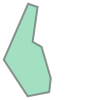

In [12]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import fiona

# 새로운 GeoDataFrame 만들기
newdata = gpd.GeoDataFrame()

# 전북대학교 좌표
coordinates = [(35.852732, 127.127619), (35.850464, 127.135362), (35.848271, 127.136621), (35.849481, 127.145203), (35.847137, 127.145996), (35.841126, 127.132190), (35.847024, 127.123189), (35.852344, 127.124224)]

# Shapely polygon 생성하기
poly = Polygon(coordinates)
poly

In [13]:
# 폴리곤을 "geometry"열에 넣기
newdata.loc[0, "geometry"] = poly
newdata

,geometry
0,"POLYGON ((35.853 127.128, 35.850 127.135, 35.8..."


In [14]:
# 위치 이름 추가하기
newdata.loc[0, "Location"] = "JeonbukUniversity"
newdata

,geometry,Location
0,"POLYGON ((35.853 127.128, 35.850 127.135, 35.8...",JeonbukUniversity


In [15]:
newdata.crs

아직은 데이터에 대한 정보가 없다. GeoDataFrame에 CRS를 추가해보자. fiona라는 Python 모듈에는 GeoDataFrame의 좌표계를 전달하기 위한 from_epsg()라는 함수가 있다. 이를 사용하여 WGS84(epsg 코드: 4326)라고 설정해준다.

In [16]:
from fiona.crs import from_epsg

newdata.crs = from_epsg(4326)
newdata.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [17]:
# 저장하기
out = r"Dataset/Lesson2/Jeonbuknationaluniversity.shp"
newdata.to_file(out)

## Pro -tips (선택적 팁)
Pandas/Geopandas에서 사용할 수 있는 정말 유용한 기능 중 하나는 groupby()이다. 이 함수는 선택한 열의 값을 기준으로 데이터를 그룹화한다.<br/>
DAMSELFISH_distribution.shp을 개별적 그룹으로 나누고 개별 shapefile로 만들어보자.


In [18]:
# "BINOMIAL"열을 기준으로 데이터를 묶기
fp = "Dataset/Lesson2/DAMSELFISH_distributions.shp"
data = gpd.read_file(fp)
grouped = data.groupby("BINOMIAL")
grouped

In [19]:
# 그룹에 대해 반복하기
for key, values in grouped:
  individual_fish = values
individual_fish

,ID_NO,BINOMIAL,ORIGIN,COMPILER,YEAR,CITATION,SOURCE,DIST_COMM,ISLAND,SUBSPECIES,...,RL_UPDATE,KINGDOM_NA,PHYLUM_NAM,CLASS_NAME,ORDER_NAME,FAMILY_NAM,GENUS_NAME,SPECIES_NA,CATEGORY,geometry
27,154915.0,Teixeirichthys jordani,1,NaN,2012,"Red List Index (Sampled Approach), Zoological ...",NaN,NaN,NaN,NaN,...,2012.2,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((121.63003 33.04249, 121.63219 33.042..."
28,154915.0,Teixeirichthys jordani,1,NaN,2012,"Red List Index (Sampled Approach), Zoological ...",NaN,NaN,NaN,NaN,...,2012.2,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((32.56219 29.97489, 32.56497 29.96967..."
29,154915.0,Teixeirichthys jordani,1,NaN,2012,"Red List Index (Sampled Approach), Zoological ...",NaN,NaN,NaN,NaN,...,2012.2,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((130.90521 34.02498, 130.90710 34.022..."
30,154915.0,Teixeirichthys jordani,1,NaN,2012,"Red List Index (Sampled Approach), Zoological ...",NaN,NaN,NaN,NaN,...,2012.2,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((56.32233 -3.70727, 56.32294 -3.70872..."
31,154915.0,Teixeirichthys jordani,1,NaN,2012,"Red List Index (Sampled Approach), Zoological ...",NaN,NaN,NaN,NaN,...,2012.2,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((40.64476 -10.85502, 40.64600 -10.855..."
32,154915.0,Teixeirichthys jordani,1,NaN,2012,"Red List Index (Sampled Approach), Zoological ...",NaN,NaN,NaN,NaN,...,2012.2,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((48.11258 -9.33510, 48.11406 -9.33614..."
33,154915.0,Teixeirichthys jordani,1,NaN,2012,"Red List Index (Sampled Approach), Zoological ...",NaN,NaN,NaN,NaN,...,2012.2,ANIMALIA,CHORDATA,ACTINOPTERYGII,PERCIFORMES,POMACENTRIDAE,Teixeirichthys,jordani,LC,"POLYGON ((51.75404 -9.21679, 51.75532 -9.21879..."


위 처럼, 이제 각 데이터 세트가 별도의 GeoDataFrames로 그룹화되어 출력 파일 경로 이름을 만드는 변수 키를 사용하여 Shape 파일로 내보낼 수 있다. 이제 이러한 종을 개별 Shape 파일로 내보내자.

In [20]:
import os

# 파일경로 설정하기
outFolder = r"Dataset/Lesson2/"

# 결과 파일 생성하기 (os를 이용해 폴더가 만들어져있다면 이 경로에, 없다면 만들도록 함)
resultFolder = os.path.join(outFolder, "Results")
if not os.path.exists(resultFolder):
    os.makedirs(resultFolder)

for key, values in grouped:
    # 파일이름 포맷팅
    outName = "%s.shp" % key.replace(" ", "_")
    print("Processing: %s" % key)

    # 파일 경로에 조인
    outpath = os.path.join(resultFolder, outName)

    # 변환
    values.to_file(outpath)

Processing: Abudefduf concolor
Processing: Abudefduf declivifrons
Processing: Abudefduf troschelii
Processing: Amphiprion sandaracinos
Processing: Azurina eupalama
Processing: Azurina hirundo
Processing: Chromis alpha
Processing: Chromis alta
Processing: Chromis atrilobata
Processing: Chromis crusma
Processing: Chromis cyanea
Processing: Chromis flavicauda
Processing: Chromis intercrusma
Processing: Chromis limbaughi
Processing: Chromis pembae
Processing: Chromis punctipinnis
Processing: Chrysiptera flavipinnis
Processing: Hypsypops rubicundus
Processing: Microspathodon bairdii
Processing: Microspathodon dorsalis
Processing: Nexilosus latifrons
Processing: Stegastes acapulcoensis
Processing: Stegastes arcifrons
Processing: Stegastes baldwini
Processing: Stegastes beebei
Processing: Stegastes flavilatus
Processing: Stegastes leucorus
Processing: Stegastes rectifraenum
Processing: Stegastes redemptus
Processing: Teixeirichthys jordani
